# Методы оптимизации в машинном обучении

### О задании

Настоящее практическое задание посвящено методу градиентного спуска и методу Ньютона. Задание состоит из пяти разделов. В каждом разделе вам предлагается выполнить несколько заданий.

# 1 Алгоритмы

## 1.1 Методы спуска: Общая концепция

Рассматриваем задачу гладкой безусловной оптимизации:
$$\underset{x∈R^n}{min} f(x).$$

Методы спуска итеративно строят последовательность точек $(x_k)^∞_{k=0}$ из $R^n$ по правилу
$$x_{k+1}=x_k+α_kd_k.$$

Число k= 0, 1 ,... называется номером итерации метода. Скаляр $α_k ≥ 0$ называется длиной шага, а вектор $d_k∈R^n$ называется направлением поиска. В методах спуска требуется, чтобы направление поиска $d_k$ являлось направлением спуска для функции f в точке $x_k$, т. е. удовлетворяло нервенству.

$$〈∇f(x_k),d_k〉< 0. $$

В этом случае можно гарантировать, что для всех достаточно маленьких $α_k$ значение функции f в новой точкеx k+1 уменьшится:
$$f(x_{k+1})< f(x_k).$$
Общая схема метода спуска приведена ниже:

**Алгоритм 1** Общая схема метода спуска  
**Вход:** Начальная точка $x_0$; максимальное число итераций $K$.  
1:**for k ← 0 to K do**  
2:&nbsp;&nbsp;&nbsp;&nbsp;*(Вызов оракула)* Вычислить $f(x_k), ∇f(x_k)$ и пр.  
3:&nbsp;&nbsp;&nbsp;&nbsp;*(Критерий остановки)* Если выполнен критерий остановки, то выход.  
4:&nbsp;&nbsp;&nbsp;&nbsp;*(Вычисление направления)* Вычислить направление спуска $d_k$.  
5:&nbsp;&nbsp;&nbsp;&nbsp;*(Линейный поиск)* Найти подходящую длину шага $α_k$.  
6:&nbsp;&nbsp;&nbsp;&nbsp;*(Обновление)* $x_{k+1} ← x_k + α_k d_k$.  
7:**end for**  
**Выход:** Последняя вычисленная точка $x_k$



## 1.2 Критерий остановки

Идеальным критерием остановки в методе является проверка условия $$f(x_k)−f^*< \tilde{ε}$$, где $f^*$ - минимальное значение функции $f$, а $\tilde{ε} > 0$ - заданная точность. Такой критерий целесообразно использовать, если оптимальное значение функции $f$ известно. К сожалению, зачастую это не так, и поэтому нужно использовать другой критерий. Наиболее популярным является критерий, основанный на норме градиента: $$‖∇f(x_k)‖^2_2 <\tilde{ε}$$. Квадрат здесь ставят за тем, что для "хороших" функций невязка по функции $f(x_k)−f^*$ имеет тот же порядок, что и $‖∇f(x_k)‖^2_2$ , а не $‖∇f(x_k)‖_2$ (например, это верно для сильно-выпуклых функций с липшицевым градиентом.); например, если $‖∇f(x_k)‖_2 ∼ 10^{−5}$, то $f(x_k)−f^* ∼ 10^{−10}$. Наконец, для того, чтобы критерий не зависел от того, измеряется ли функция $f$ в "метрах" или в "километрах" (т. е. не изменялся при переходе от функции $f$ к функции $tf$, где $t > 0$), то имеет смысл использовать следующий относительный вариант критерия:
$$ ‖∇f(x_k)‖^2_2 ≤ ε‖∇f(x_0)‖^2_2 \tag{1.1},$$
где $ε∈(0,1)$ - заданная относительнаяточность. Таким образом, критерий остановки (1.1) гарантирует, что метод уменьшит начальную невязку $‖∇f(x_0)‖_2$ в $ε^{−1}$ раз. В этом задании Вам нужно будет во всех методах использовать критерий остановки (1.1).

## 1.3 Линейный поиск

Рассматривается функция
$$φ_k(α) := f(x_k+αd_k).$$
Заметим, что
$$φ′_k(α) =〈∇f(x_k+αd_k), d_k〉.$$

Поскольку $d_k$ является направлением спуска, то $φ′(0) =〈∇f(x_k),d_k〉< 0$.
Условием Армихо для $α$ называется выполение следующего неравенства:

$$φ_k(α) ≤ φ_k(0) + c_1 αφ′_k(0),$$
где $c_1 ∈(0, 0.5)$ - некоторая константа.
Для поиска точки $α$, удовлетворяющей условию Армихо, обычно используют следующую процедуру - метод дробления шага (бэктрекинг):

**Алгоритм 2** Метод дробления шага  
**Вход:** Функция $φ_k:R_+ → R$. Начальная точка: $α^{(0)}_k$.  
1:$α ← α^{(0)}_k.$  
2:**while** $φ_k(α) > φ(0) + cαφ′_k(0)$ **do**  
3:&nbsp;&nbsp;&nbsp;&nbsp;$α ← α/2$.  
4:**end while**
**Выход:** $α$  

"Адаптивный" метод подбора шага запоминает величину $α_k$, найденную на текущей итерации и
на следующей итерации начинает процедуру дробления с $α(0)_{k+1}:= 2α_k$. Исключение здесь составляют ньютоновские и квазиньютоновские методы - в этих методах процедуру дробления шага всегда нужно начинать с $α(0)_k := 1$.

**Сильные условия Вульфа:**
$$φ_k(α) ≤ φ(0) + c_1 α φ′_k(0)$$
$$|φ′_k(α)|≤ c_2 |φ′_k(0)|$$

Здесь $c_1 ∈ (0, 0.5), c_2 ∈ (c_1, 1)$.  
Самостоятельно реализовывать схему для сильных условий Вульфа не нужно. Используйте биб-
лиотечную реализацию (функция `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`). В

ней начальная длина шага $α^{(0)}_k$ автоматически выбирается равной 1.




## 1.4 Градиентный спуск

Градиентный спуск:
$$x_{k+1}=x_k−α_k∇f(x_k)$$
Можно рассматривать как метод спуска, в котором направление поиска $d_k$ равно антиградиенту
$−∇f(x_k)$. Длина шага $α_k$ выбирается с помощью линейного поиска.

## 1.5 Метод Ньютона

Метод Ньютона:
$$x_{k+1}=x_k−α_k[∇^2 f(x_k)]^{-1} ∇f(x_k).$$
Для метода Ньютона очень важно использовать единичный шаг $α_k = 1$, чтобы обеспечить локальную квадратичную сходимость. Поэтому в алгоритмах линейного поиска нужно всегда первым делом
пробовать единичный шаг. Теория гарантирует, что в зоне квадратичной сходимости метода Ньютона
единичный шаг будет удовлетворять условиям Армихо/Вульфа, и поэтому автоматически будет приниматься. Если единичный шаг не удовлетворяет условиям Армихо/Вульфа, то алгоритмы линейного
поиска его уменьшат и, тем самым, обеспечат глобальную сходимость метода Ньютона.  

Вычисление Ньютоновского направления $d_k=−[∇^2 f(x_k)]^{-1} ∇f(x_k)$ эквивалентно решению линей-
ной системы уравнений:
$$∇^2 f(x_k)d_k=−∇f(x_k).$$
Если гессиан - положительно определённая матрица: $∇^2 f(x_k) \succ 0$ , то предпочтительным методом решения такой системы является разложение Холецкого, которое также, как и метод Гаусса, работает за $O(n^3)$, но является вычислительно более эффективным. Если матрица системы не является положительно определённой, то метод Холецкого сможет обнаружить и сообщить об этом.

<!-- ## 1.6 (Бонусная часть) Оптимизация вычислений

```
Рассмотрим случайf(x) =ψ(Ax).
В этом случае
∇f(x) =AT∇ψ(Ax).
```
Для линейного поиска:

```
φ(α) =ψ(Axk+αAdk), φ′(α) =〈∇ψ(Axk+αAdk),Adk〉.
```
Алгоритм 3Общая схема метода спуска дляf(x) =ψ(Ax)

```
1:fork← 0 toK− 1 do
2: (Вызов оракула)Вычислитьf(xk) =ψ(Axk),∇f(xk) =AT∇ψ(Axk)и пр.
3: (Вычисление направления)Вычислить направление спускаdk.
4: (Линейный поиск)Найти подходящую длину шагаαk:
5: Вычислитьφ(0) =ψ(Axk),φ′(0) =〈∇ψ(Axk),Adk〉.
6: Вычислитьφ( ̄α 1 ) =ψ(Axk+ ̄α 1 Adk),φ′( ̄α 1 ) =〈∇ψ(Axk+ ̄α 1 Adk),Adk〉.
7: ...
8: Вычислитьφ( ̄αs) =ψ(Axk+ ̄αsAdk),φ′( ̄αs) =〈∇ψ(Axk+ ̄αsAdk),Adk〉.
9: (Обновление)xk+1←xk+ ̄αsdk.. Axk+1=Axk+ ̄αsAdk
10:end for
```
Таким образом, в хорошей реализации должно быть в среднем лишь дваматрично-векторных про-
изведения: одно  чтобы вычислить градиентAT∇ψ(Axk), второе  чтобы вычислитьAdk. Сами
матрично-векторные произведенияAxkможно пересчитывать, используяAdk.

 -->

# 2 Модели

## 2.1 Двухклассовая логистическая регрессия

Логистическая регрессия является стандартной моделью в задачах классификации. Для простоты
рассмотрим лишь случай бинарной классификации. Неформально задача формулируется следующим
образом. Имеется обучающая выборка $((a_i, b_i))^m_{i=1}$, состоящая изmвекторов $a_i ∈ R^n$ (называемых признаками) и соответствующих им чисел $b_i ∈ {−1, 1}$ (называемых классами). Нужно построить алгоритм $b(·)$, который для произвольного нового вектора признаков $a$ автоматически определит его класс $b(a)∈{−1, 1}$.  

В модели логистической регрессии определение класса выполняется по знаку линейной комбинации
компонент вектораaс некоторыми фиксированными коэффициентами $x∈R^n$:
$$b(a) := sign(〈a,x〉).$$

Коэффициенты $x$ являются параметрами модели и настраиваются с помощью решения следующей
оптимизационной задачи:
$$\underset{x∈R^n}{min} \left( \frac{1}{m}\sum_{i=1}^m ln(1 + exp(−b_i〈a_i, x〉)) + \frac{λ}{2}‖x‖^2_2 \right) $$
где $λ > 0$ - коэффициент регуляризации (параметр модели).

## 2.2 Разностная проверка градиента и гессиана
Проверить правильность реализации подсчета градиента можно с помощью конечных разностей:
$$[∇f(x)]_i ≈ \frac{f(x+ε_1 e_i)−f(x)}{ε_1},$$
где $e_i:= (0,..., 0 , 1 , 0 ,...,0)$ - i-й базисный орт, а ε_1 - достаточно маленькое положительное число: $ε_1 ∼ \sqrt{ε_{mach}}$, где $ε_{mach}$ - машинная точность ($≈ 10 ^{-16}$ для типа `double`).

Вторые производные:
$$[∇^2 f(x)]_{ij} ≈ \frac{f(x + ε_2 e_i + ε_2 e_j) − f(x + ε_2 e_i) − f(x + ε_2 e_j) + f(x)}{ε^2_2}$$
Здесь $ε_2 ∼\sqrt[3]{ε_{mach}}$


# 3 Формулировка задания
1. Ознакомилась с кодами, прилагаемые к заданию:

https://github.com/arodomanov/cmc-mipt17-opt-course/tree/master/task

Эти файлы содержат прототипы функций, которые Вам нужно будет реализовать. Некоторые проце- дуры уже частично или полностью реализованы

2 Реализовать метод градиентного спуска (функция `gradient_descent` в модуле `optimization`) и процедуру линейного поиска (метод `line_search` в классе `LineSearchTool` в модуле `optimization`).  
**Рекомендация:** Для поиска точки, удовлетворяющей сильным условиям Вульфа, воспользуйтесь биб-
лиотечной функцией `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`. Однако следует
иметь в виду, что у этой библиотечной функции имеется один недостаток: она иногда не сходится и
возвращает значение `None`. Если библиотечный метод вернул `None`, то запустите процедуру дробления шага (бэктрекинг) для поиска точки, удовлетворяющей условию Армихо.


3 Получить формулы для градиента и гессиана функции логистической регрессии. Выписать их в отчет
в матрично-векторной форме с использованием поэлементных функций, но без каких-либо суммирований. Также выписать в отчетвыражение для самой функции логистической регрессии в матрично-векторной форме (без явных суммирований).  
**Замечание:** В матрично-вектрной форме допускается использование операций матричного сложения/произведения, умножения на скаляр, транспонирования, стандартного скалярного произведения, поэлементного произведения, а также применения ко всем элементам вектора некоторой скалярной функции. Кроме этого, допускается использование стандартных матриц/векторов (заданного размера): единичная матрица $I_n$, нулевая матрица $0_{m×n}$, нулевой вектор $0_n$, вектор из всех единиц $1_n := (1,... ,1)$.

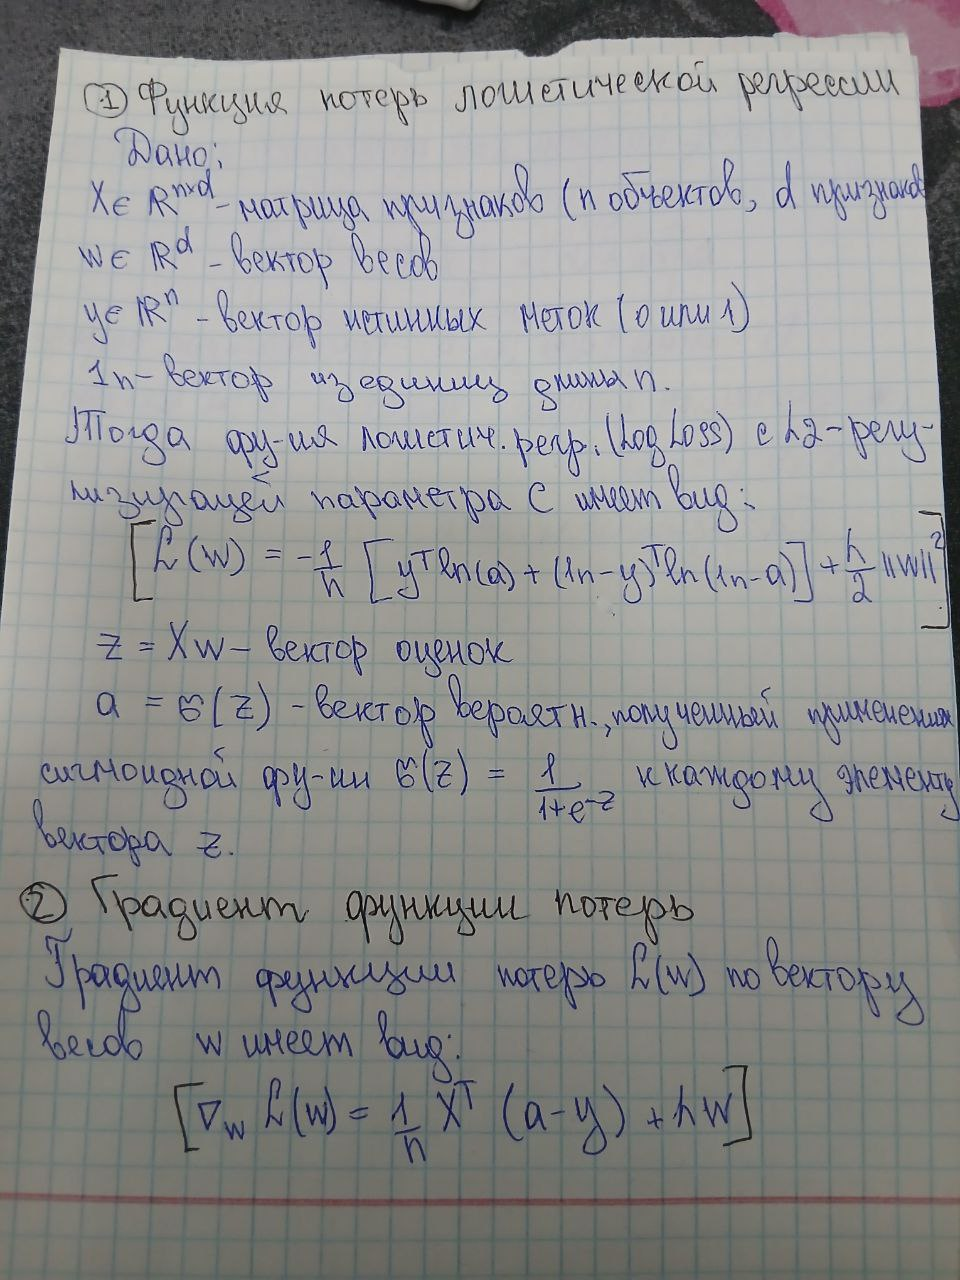

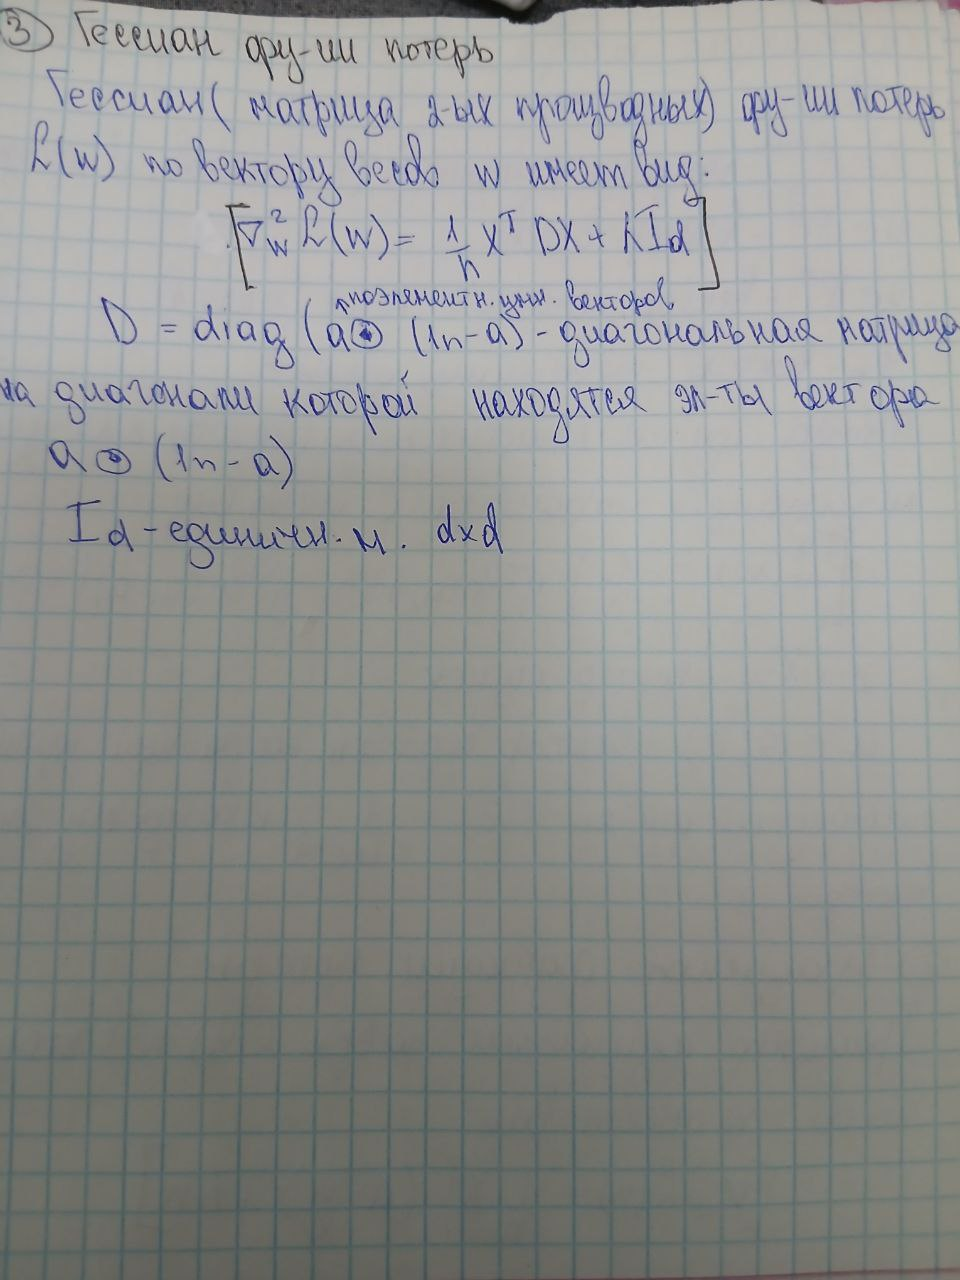

4 Реализовать оракул логистической регрессии (класс `LogRegL2Oracle` в модуле `oracles`). Также доделать реализацию вспомогательной функции `create_log_reg_oracle` в модуле `oracles`.  
**Замечание:** Реализация оракула должна быть полностью векторизованной, т. е. код не должен содержать никаких циклов.  
**Замечание:** Ваш код должен поддерживать как плотные матрицыAтипаnp.array, так и разрежен-
ные типа `scipy.sparse.csr_matrix`.  
**Замечание:** Нигде в промежуточных вычислениях не стоит вычислять значение $exp(−b_i〈a_i, x〉)$, иначе может произойти переполнение. Вместо этого следует напрямую вычислять необходимые величины с помощью специализированных для этого функций: `np.logaddexp` для $ln(1+exp(·))$ и `scipy.special.expit` для $1 /(1 + exp(·))$.

5 Реализовать подсчет разностных производных (функции `grad_finite_diff` и `hess_finite_diff` в модуле `oracles`). Проверить правильность реализации подсчета градиента и гессиана логистического
оракула с помощью реализованных функций. Для этого сгенерируйте небольшую модельную выборку
(матрицу $A$ и вектор $b$) и сравните значения, выдаваемые методами `grad` и `hess`, с соответствующими разностными аппроксимациями в нескольких пробных точкахx.

6 Реализовать метод Ньютона (функция `newton` в модуле `optimization`).

**Замечание:** Для поиска направления в методе Ньютона не нужно в явном виде обращать гессиан (с
помощью функции `np.linalg.inv`) или использовать самый общий метод для решения системы линей-
ных уравнений (`numpy.linalg.solve`). Вместо этого следует учесть тот факт, что в рассматриваемой
задаче гессиан является симметричной положительно определенной матрицей и воспользоваться раз-
ложением Холецкого (функции `scipy.linalg.cho_factor` и `scipy.linalg.cho_solve`).


7 Провести эксперименты, описанные ниже. Написать отчет.

8 (Бонусная часть) Реализовать оптимизированный оракул логистической


регрессии, который запомина-
ет последние матрично-векторные произведения (классLogRegL2OptimizedOracleв модулеoptimization).
Оптимизированный оракул отличается от обычного в следующих трех пунктах:

1. При последовательных вычислениях значения функции (методfunc), градиента (методgrad) и
    гессиана (методhess) в одной и той же точкеx, матрично-векторное произведениеAxне вычис-
    ляется повторно.
2. В процедурахfunc_directionalиgrad_directionalвыполняется предподсчет матрично-векторных
    произведенийAxиAd. Если эти процедуры вызываются последовательно для одних и тех же зна-
    чений точкиxи/или направленияd, то матрично-векторные произведенияAxи/илиAdзаново не
    вычисляются. Если перед вызовом или после вызоваfunc_directionalи/илиgrad_directional
    присутствуют вызовыfuncи/илиgradи/илиhessв той же самой точкеx, то матрично-векторное
    произведениеAxне должно вычисляться повторно.
3. Методыfunc_directionalиgrad_directionalзапоминают внутри себя последнюю тестовую
    точкуxˆ:=x+αd, а также соответствующее значение матрично-векторного произведенияAxˆ=
    Ax+αAd. Если далее одна из процедурfunc,grad,hess,func_directional,grad_directional
    вызывается в точкеxˆ, то соответствующее матрично-векторное произведениеAˆxзаново не вы-
    числяется.
 -->

Дополнила файлы optimization и oracles.Запустила тесты и все заработало

In [8]:
!python presubmit_tests.py

Running simplified tests...
✓ Python 3 check passed
✓ Quadratic Oracle passed
✓ Logistic Regression Basic passed
✓ Gradient Finite Difference passed
✓ Hessian Finite Difference passed
✓ Line Search Constant passed
✓ Gradient Descent Basic passed
✓ Newton Basic passed
Results: 8/8 tests passed
🎉 All tests passed!


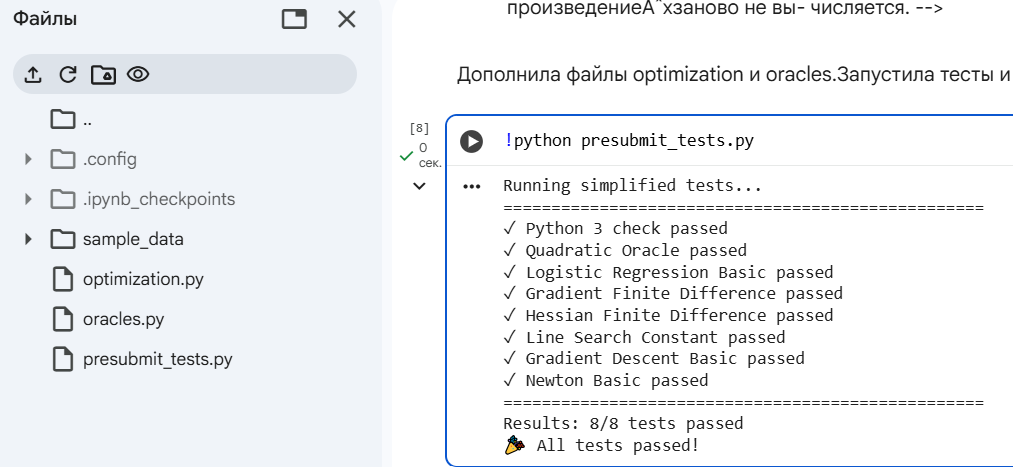